# 1. Data Preprocessing

In [1]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
# Importing the data
df = pd.read_csv("ghana_water_quality_data.csv")
df.head()

,Community,Region,Latitude,Longitude,Water Quality,Distance to Nearest River (km),Is Mining Zone,Contamination Level,Contamination Type,Water Source,...,Average Daily Water Needs (liters),Prevalence of Water Borne Diseases,Accessibility,Urban/Rural,Sanitation Facilities Available,Average Household Income (GHS),Education Level (Avg Years),Government Intervention Present,NGO Presence,Year Data Collected
0,Wa port,North East,10.246253,-0.121952,0,10.8,1,7.02,Sediment,Sachet water,...,742000,0.300,Boat access only,Urban,0,1168,4.9,0,1,2018
1,Bawku view,Western,5.172394,-2.512235,1,2.4,0,0.62,NaN,Pipe-borne,...,92870,0.261,Dirt road,Rural,0,4185,3.6,1,0,2015
2,Hohoe stad,Upper West,10.199718,-2.293461,1,1.1,0,1.72,NaN,Dam,...,527119,0.104,Boat access only,Rural,1,4870,7.6,0,0,2016
3,Madina ville,North East,10.662465,-0.774931,1,19.3,0,0.40,NaN,Stream,...,168816,0.276,Footpath,Urban,1,3841,9.2,0,0,2023
4,Obuasi stad,Savannah,9.022542,-1.752403,1,17.9,0,1.61,NaN,Rainwater,...,243015,0.276,Asphalt road,Rural,1,4245,6.4,0,0,2021


In [3]:
# Exploring the dataset
summary = pd.DataFrame({
    'Field': df.columns,
    'Type': df.dtypes.values,
    'Example Datapoint': df.iloc[0].values
})

# Print the summary
print(summary.to_string(index=False))

                             Field    Type Example Datapoint
                         Community  object           Wa port
                            Region  object        North East
                          Latitude float64         10.246253
                         Longitude float64         -0.121952
                     Water Quality   int64                 0
    Distance to Nearest River (km) float64              10.8
                    Is Mining Zone   int64                 1
               Contamination Level float64              7.02
                Contamination Type  object          Sediment
                      Water Source  object      Sachet water
                Water Access Score float64               1.6
                Number of Children   int64             12119
                        Population   int64             37100
Average Daily Water Needs (liters)   int64            742000
Prevalence of Water Borne Diseases float64               0.3
                     Acc

In [4]:
# Dropping irrelevant columns
columns_to_drop = ['Community', 'Latitude', 'Longitude', 'Year Data Collected']

df = df.drop(columns=columns_to_drop)
df.head()

,Region,Water Quality,Distance to Nearest River (km),Is Mining Zone,Contamination Level,Contamination Type,Water Source,Water Access Score,Number of Children,Population,Average Daily Water Needs (liters),Prevalence of Water Borne Diseases,Accessibility,Urban/Rural,Sanitation Facilities Available,Average Household Income (GHS),Education Level (Avg Years),Government Intervention Present,NGO Presence
0,North East,0,10.8,1,7.02,Sediment,Sachet water,1.6,12119,37100,742000,0.300,Boat access only,Urban,0,1168,4.9,0,1
1,Western,1,2.4,0,0.62,NaN,Pipe-borne,4.9,5059,18574,92870,0.261,Dirt road,Rural,0,4185,3.6,1,0
2,Upper West,1,1.1,0,1.72,NaN,Dam,6.2,11396,31007,527119,0.104,Boat access only,Rural,1,4870,7.6,0,0
3,North East,1,19.3,0,0.40,NaN,Stream,7.0,4423,14068,168816,0.276,Footpath,Urban,1,3841,9.2,0,0
4,Savannah,1,17.9,0,1.61,NaN,Rainwater,5.8,4332,14295,243015,0.276,Asphalt road,Rural,1,4245,6.4,0,0


In [5]:
# Encoding binary variables

le = LabelEncoder()

df["Region"] = le.fit_transform(df["Region"])
df["Contamination Type"] = le.fit_transform(df["Contamination Type"])
df["Water Source"] = le.fit_transform(df["Water Source"])
df["Accessibility"] = le.fit_transform(df["Accessibility"])
df["Urban/Rural"] = le.fit_transform(df["Urban/Rural"])

df.head()

,Region,Water Quality,Distance to Nearest River (km),Is Mining Zone,Contamination Level,Contamination Type,Water Source,Water Access Score,Number of Children,Population,Average Daily Water Needs (liters),Prevalence of Water Borne Diseases,Accessibility,Urban/Rural,Sanitation Facilities Available,Average Household Income (GHS),Education Level (Avg Years),Government Intervention Present,NGO Presence
0,7,0,10.8,1,7.02,7,6,1.6,12119,37100,742000,0.300,1,1,0,1168,4.9,0,1
1,14,1,2.4,0,0.62,9,3,4.9,5059,18574,92870,0.261,2,0,0,4185,3.6,1,0
2,12,1,1.1,0,1.72,9,1,6.2,11396,31007,527119,0.104,1,0,1,4870,7.6,0,0
3,7,1,19.3,0,0.40,9,7,7.0,4423,14068,168816,0.276,3,1,1,3841,9.2,0,0
4,10,1,17.9,0,1.61,9,4,5.8,4332,14295,243015,0.276,0,0,1,4245,6.4,0,0


In [6]:
# Checking the datatypes
df.dtypes

,0
Region,int64
Water Quality,int64
Distance to Nearest River (km),float64
Is Mining Zone,int64
Contamination Level,float64
Contamination Type,int64
Water Source,int64
Water Access Score,float64
Number of Children,int64
Population,int64


In [7]:
# Ensuring the datatypes are all correct

df["Region"] = df["Region"].astype("category")
df["Water Quality"] = df["Water Quality"].astype("category")
df['Is Mining Zone'] = df['Is Mining Zone'].astype("category")
df["Contamination Type"] = df["Contamination Type"].astype("category")
df["Water Source"] = df["Water Source"].astype("category")
df["Urban/Rural"] = df["Urban/Rural"].astype("category")
df["Accessibility"] = df["Accessibility"].astype("category")
df['Government Intervention Present'] = df['Government Intervention Present'].astype("category")
df['NGO Presence'] = df['NGO Presence'].astype("category")
df['Sanitation Facilities Available'] = df['Sanitation Facilities Available'].astype("category")

# Sanity check
df.dtypes

,0
Region,category
Water Quality,category
Distance to Nearest River (km),float64
Is Mining Zone,category
Contamination Level,float64
Contamination Type,category
Water Source,category
Water Access Score,float64
Number of Children,int64
Population,int64


In [8]:
# Separate the features and target variable
X = df.drop('Water Quality', axis=1)
y = df['Water Quality']

In [9]:
# Scaling the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#2. Classical SVM

In [11]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.77

#3. Quantum SVC (QSVC)

In [12]:
# Installing PennyLane

!pip install PennyLane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 106.3 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pennylane/capture/capture_operators.py:33: RuntimeWarning: PennyLane is not yet compatible with JAX versions > 0.4.28. You have version 0.5.2 installed. Please downgrade JAX to <=0.4.28 to avoid runtime errors.
  warnings.warn(


QUANTUM SVM CLASSIFICATION
1. Reducing dimensionality with PCA...
   Data shape: 140 train samples, 60 test samples
   Features reduced from 8 to 4

2. Computing quantum kernel matrix (training)...
   Training kernel matrix shape: (140, 140)

3. Training SVM...
   Number of support vectors: 99

4. Computing quantum kernel matrix (testing)...
   Test kernel matrix shape: (60, 140)

5. Making predictions...

6. Evaluating model...

Model Performance:
------------------------------
Accuracy    : 0.8333
F1 Score    : 0.8214
Precision   : 0.8214
Recall      : 0.8214
AUROC       : 0.8694
AUPRC       : 0.8921


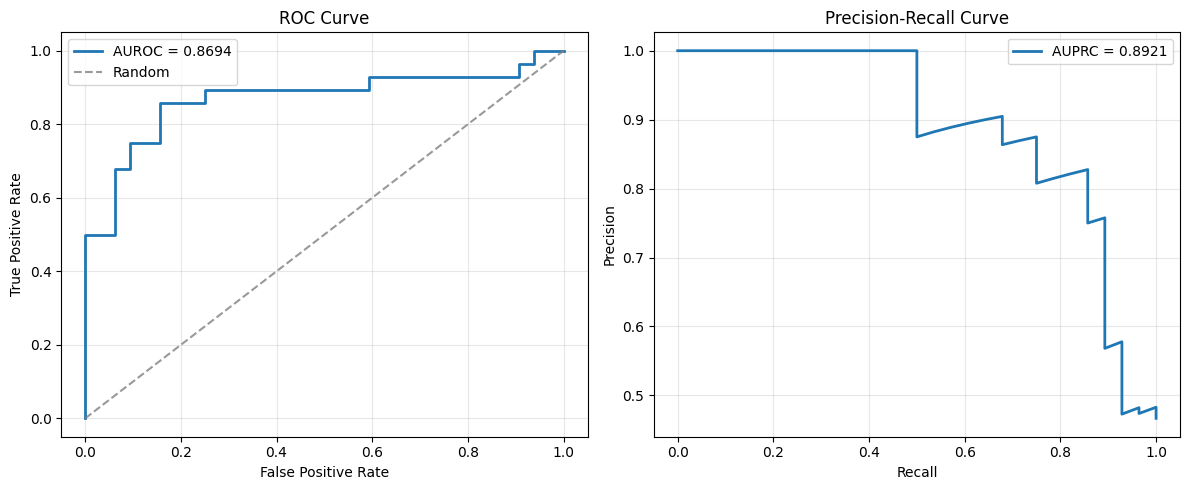


QUANTUM SVM ANALYSIS COMPLETE


In [13]:
import pennylane as qml
import numpy as np
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from functools import lru_cache
from concurrent.futures import ThreadPoolExecutor
import multiprocessing as mp

# Configuration
N_COMPONENTS = 4
N_QUBITS = 4
dev = qml.device("default.qubit", wires=N_QUBITS)

# Optimized quantum kernel circuit with caching
@lru_cache(maxsize=10000)
def _cached_feature_map(x_tuple):
    """Cached version of feature map for repeated computations"""
    x = np.array(x_tuple)

    @qml.qnode(dev, interface="numpy")
    def feature_map_circuit():
        qml.templates.AngleEmbedding(x, wires=range(N_QUBITS))
        return qml.state()

    return feature_map_circuit()

def feature_map(x):
    """Wrapper for cached feature map"""
    return _cached_feature_map(tuple(x))

# Optimized kernel computation with batching and parallelization
def quantum_kernel_matrix_optimized(X1, X2, batch_size=32):
    """
    Optimized quantum kernel matrix computation with batching
    """
    n1, n2 = len(X1), len(X2)
    kernel_matrix = np.zeros((n1, n2))

    # Process in batches to optimize memory usage
    for i in range(0, n1, batch_size):
        end_i = min(i + batch_size, n1)
        batch_X1 = X1[i:end_i]

        for j in range(0, n2, batch_size):
            end_j = min(j + batch_size, n2)
            batch_X2 = X2[j:end_j]

            # Compute kernel for this batch
            batch_kernel = _compute_kernel_batch(batch_X1, batch_X2)
            kernel_matrix[i:end_i, j:end_j] = batch_kernel

    return kernel_matrix

def _compute_kernel_batch(X1_batch, X2_batch):
    """Compute kernel for a batch of samples"""
    batch_size1, batch_size2 = len(X1_batch), len(X2_batch)
    batch_kernel = np.zeros((batch_size1, batch_size2))

    for i, x1 in enumerate(X1_batch):
        for j, x2 in enumerate(X2_batch):
            # Compute fidelity between quantum states
            state1 = feature_map(x1)
            state2 = feature_map(x2)

            # Fidelity = |<ψ1|ψ2>|²
            fidelity = np.abs(np.vdot(state1, state2)) ** 2
            batch_kernel[i, j] = fidelity

    return batch_kernel

# Optimized PCA and scaling with better memory management
def apply_pca_optimized(X_train, X_test, n_components=N_COMPONENTS):
    """Optimized PCA application with memory efficiency"""
    # Use incremental PCA for large datasets
    if X_train.shape[0] > 10000:
        from sklearn.decomposition import IncrementalPCA
        pca = IncrementalPCA(n_components=n_components, batch_size=1000)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)
    else:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

    # Efficient scaling
    scaler = MinMaxScaler(feature_range=(0, np.pi))
    X_train_scaled = scaler.fit_transform(X_train_pca)
    X_test_scaled = scaler.transform(X_test_pca)

    return X_train_scaled, X_test_scaled, pca, scaler

# Optimized evaluation with vectorized operations
def evaluate_model_optimized(y_true, y_pred, y_pred_proba=None):
    """Optimized evaluation with better performance"""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='weighted' if len(np.unique(y_true)) > 2 else 'binary'),
        'Precision': precision_score(y_true, y_pred, average='weighted' if len(np.unique(y_true)) > 2 else 'binary'),
        'Recall': recall_score(y_true, y_pred, average='weighted' if len(np.unique(y_true)) > 2 else 'binary'),
    }

    # Only compute probabilistic metrics if probabilities are available
    if y_pred_proba is not None:
        try:
            metrics['AUROC'] = roc_auc_score(y_true, y_pred_proba)
            metrics['AUPRC'] = average_precision_score(y_true, y_pred_proba)
        except ValueError:
            # Handle multi-class case
            pass

    # Print metrics efficiently
    print("\nModel Performance:")
    print("-" * 30)
    for name, value in metrics.items():
        print(f'{name:<12}: {value:.4f}')

    return metrics

# Optimized plotting function
def plot_evaluation_curves(y_true, y_pred_proba, metrics):
    """Optimized plotting with better performance"""
    if y_pred_proba is None:
        print("Probability predictions not available for curve plotting")
        return

    plt.figure(figsize=(12, 5))

    # ROC Curve
    plt.subplot(1, 2, 1)
    fpr, tpr, _ = roc_curve(y_true, y_pred_proba)
    plt.plot(fpr, tpr, linewidth=2, label=f'AUROC = {metrics.get("AUROC", 0):.4f}')
    plt.plot([0, 1], [0, 1], '--', color='gray', alpha=0.8, label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Precision-Recall Curve
    plt.subplot(1, 2, 2)
    precision_vals, recall_vals, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.plot(recall_vals, precision_vals, linewidth=2, label=f'AUPRC = {metrics.get("AUPRC", 0):.4f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# Main optimized QSVC workflow
def run_qsvc_optimized(X_train, X_test, y_train, y_test, batch_size=32, use_probability=False):
    """
    Optimized QSVC workflow with better performance and memory management
    """
    print("=" * 50)
    print("QUANTUM SVM CLASSIFICATION")
    print("=" * 50)

    # Step 1: Dimensionality reduction and scaling
    print("1. Reducing dimensionality with PCA...")
    X_train_scaled, X_test_scaled, pca, scaler = apply_pca_optimized(X_train, X_test)
    print(f"   Data shape: {X_train_scaled.shape[0]} train samples, {X_test_scaled.shape[0]} test samples")
    print(f"   Features reduced from {X_train.shape[1]} to {X_train_scaled.shape[1]}")

    # Step 2: Quantum kernel computation (training)
    print("\n2. Computing quantum kernel matrix (training)...")
    K_train = quantum_kernel_matrix_optimized(X_train_scaled, X_train_scaled, batch_size=batch_size)
    print(f"   Training kernel matrix shape: {K_train.shape}")

    # Step 3: SVM training
    print("\n3. Training SVM...")
    if use_probability:
        clf = SVC(kernel='precomputed', probability=True)
    else:
        clf = SVC(kernel='precomputed')

    clf.fit(K_train, y_train)
    print(f"   Number of support vectors: {len(clf.support_)}")

    # Step 4: Quantum kernel computation (testing)
    print("\n4. Computing quantum kernel matrix (testing)...")
    K_test = quantum_kernel_matrix_optimized(X_test_scaled, X_train_scaled, batch_size=batch_size)
    print(f"   Test kernel matrix shape: {K_test.shape}")

    # Step 5: Prediction
    print("\n5. Making predictions...")
    y_pred = clf.predict(K_test)

    y_pred_proba = None
    if use_probability:
        y_pred_proba = clf.predict_proba(K_test)[:, 1]  # Probability of positive class

    # Step 6: Evaluation
    print("\n6. Evaluating model...")
    metrics = evaluate_model_optimized(y_test, y_pred, y_pred_proba)

    # Step 7: Plotting (if probabilities available)
    if use_probability and y_pred_proba is not None:
        plot_evaluation_curves(y_test, y_pred_proba, metrics)

    print("\n" + "=" * 50)
    print("QUANTUM SVM ANALYSIS COMPLETE")
    print("=" * 50)

    return clf, metrics, {'pca': pca, 'scaler': scaler}

# Additional utility functions for performance monitoring
def clear_cache():
    """Clear the feature map cache to free memory"""
    _cached_feature_map.cache_clear()
    print("Feature map cache cleared")

def cache_info():
    """Display cache statistics"""
    info = _cached_feature_map.cache_info()
    print(f"Cache stats - Hits: {info.hits}, Misses: {info.misses}, Size: {info.currsize}")

# Example usage function
def example_usage():
    """Example of how to use the optimized QSVC"""
    # Generate sample data
    from sklearn.datasets import make_classification

    X, y = make_classification(n_samples=200, n_features=8, n_classes=2,
                              n_informative=4, n_redundant=2, random_state=42)

    # Split data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run optimized QSVC
    clf, metrics, preprocessors = run_qsvc_optimized(
        X_train, X_test, y_train, y_test,
        batch_size=16,
        use_probability=True
    )

    return clf, metrics, preprocessors

if __name__ == "__main__":
    # Run example
    example_usage()

#4. QNN

In [15]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 19.1 MB/s eta 0:00:00


QUANTUM NEURAL NETWORK CLASSIFICATION

1. Feature preprocessing...

2. Training QNN...

Training QNN:
------------------------------
Epoch 1/100 - LR: 0.0500, Train loss: 1.0047, Val loss: 0.9914
Epoch 11/100 - LR: 0.0488, Train loss: 0.8915, Val loss: 0.9901
Epoch 21/100 - LR: 0.0452, Train loss: 0.8756, Val loss: 0.9914
Epoch 31/100 - LR: 0.0397, Train loss: 0.8721, Val loss: 0.9917
Epoch 41/100 - LR: 0.0327, Train loss: 0.8711, Val loss: 0.9921
Epoch 51/100 - LR: 0.0250, Train loss: 0.8709, Val loss: 0.9926
Epoch 61/100 - LR: 0.0173, Train loss: 0.8711, Val loss: 0.9932
Epoch 71/100 - LR: 0.0103, Train loss: 0.8714, Val loss: 0.9937
Epoch 81/100 - LR: 0.0048, Train loss: 0.8729, Val loss: 0.9937
Epoch 91/100 - LR: 0.0012, Train loss: 0.8737, Val loss: 0.9934


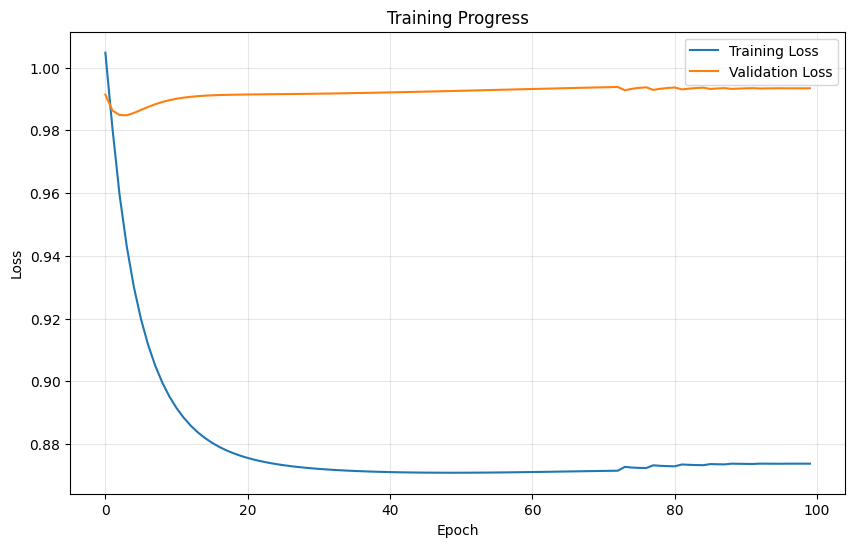


3. Making predictions...

4. Evaluating model...


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [34]:
import pennylane as qml
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pennylane import numpy as pnp
from pennylane.optimize import AdamOptimizer
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers

# Configuration
N_COMPONENTS = 4  # Number of PCA components
N_QUBITS = 4      # Number of qubits (matches PCA components)
N_LAYERS = 3      # Number of variational layers
N_EPOCHS = 100    # Training epochs
INITIAL_LR = 0.05 # Initial learning rate
BATCH_SIZE = 32   # Batch size for training

dev = qml.device("default.qubit", wires=N_QUBITS)

# Quantum Neural Network Architecture
def quantum_neural_network(params, x):
    """Improved variational quantum circuit with stronger entanglement"""
    # Feature embedding with re-uploading
    for i in range(N_LAYERS):
        AngleEmbedding(x, wires=range(N_QUBITS), rotation='Y')
        # Correct parameter shape for StronglyEntanglingLayers: (1, N_QUBITS, 3)
        StronglyEntanglingLayers(params[i], wires=range(N_QUBITS))

    # Measurement - expectation value of PauliZ on each qubit
    return [qml.expval(qml.PauliZ(i)) for i in range(N_QUBITS)]

# Quantum node
@qml.qnode(dev, interface="autograd")
def qnn_circuit(params, x):
    return quantum_neural_network(params, x)

# Classical post-processing
def classical_layer(weights, bias, quantum_output):
    """Classical neural network layer with bias"""
    output = pnp.dot(weights, pnp.array(quantum_output)) + bias
    return output

# Full hybrid model
def hybrid_model(params, weights, bias, x):
    """Combines quantum and classical components"""
    quantum_output = qnn_circuit(params, x)
    return classical_layer(weights, bias, quantum_output)

# Cost function
def cost_fn(params, weights, bias, X, Y):
    """Mean squared error cost function"""
    predictions = [hybrid_model(params, weights, bias, x) for x in X]
    return pnp.mean((pnp.array(predictions) - pnp.array(Y)) ** 2)

# Learning rate scheduler
def lr_schedule(epoch, initial_lr):
    """Cosine annealing learning rate schedule"""
    return initial_lr * 0.5 * (1 + pnp.cos(epoch / N_EPOCHS * np.pi))

# Enhanced PCA and scaling
def apply_pca_optimized(X_train, X_test, n_components=N_COMPONENTS):
    """Improved feature preprocessing"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    angle_scaler = MinMaxScaler(feature_range=(0, np.pi))
    X_train_angles = angle_scaler.fit_transform(X_train_pca)
    X_test_angles = angle_scaler.transform(X_test_pca)

    return X_train_angles, X_test_angles, pca, angle_scaler

# Enhanced evaluation metrics
def evaluate_model_enhanced(y_true, y_pred, y_pred_proba=None):
    """More comprehensive model evaluation"""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average='binary'),
        'Precision': precision_score(y_true, y_pred, average='binary'),
        'Recall': recall_score(y_true, y_pred, average='binary'),
    }

    if y_pred_proba is not None:
        try:
            metrics['AUROC'] = roc_auc_score(y_true, y_pred_proba)
            metrics['AUPRC'] = average_precision_score(y_true, y_pred_proba)
        except ValueError:
            pass

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nModel Performance:")
    print("-" * 30)
    for name, value in metrics.items():
        print(f'{name:<12}: {value:.4f}')

    return metrics

# Corrected parameter initialization
def init_params_enhanced():
    """Proper parameter initialization for StronglyEntanglingLayers"""
    # Initialize parameters with proper shape and type
    params = []
    for _ in range(N_LAYERS):
        # Each layer needs shape (1, N_QUBITS, 3)
        layer_params = pnp.array(np.random.uniform(0, 2*np.pi, (1, N_QUBITS, 3)), requires_grad=True)
        params.append(layer_params)

    weights = pnp.array(np.random.normal(0, 0.1, N_QUBITS), requires_grad=True)
    bias = pnp.array(0.0, requires_grad=True)

    return params, weights, bias

# Enhanced training function
def train_qnn_enhanced(params, weights, bias, X_train, Y_train, X_val, Y_val):
    """Improved training process with learning rate scheduling"""
    best_val_loss = float('inf')
    best_params, best_weights, best_bias = None, None, None

    train_losses = []
    val_losses = []

    print("\nTraining QNN:")
    print("-" * 30)

    for epoch in range(N_EPOCHS):
        current_lr = lr_schedule(epoch, INITIAL_LR)
        opt = AdamOptimizer(current_lr)

        # Batch training
        for batch_start in range(0, len(X_train), BATCH_SIZE):
            batch_end = batch_start + BATCH_SIZE
            X_batch = X_train[batch_start:batch_end]
            Y_batch = Y_train[batch_start:batch_end]

            # Convert to numpy arrays before training step
            X_batch_np = np.array(X_batch)
            Y_batch_np = np.array(Y_batch)

            # Corrected optimization step - returns only the parameters and cost
            new_params, new_weights, new_bias = opt.step(
                lambda p, w, b: cost_fn(p, w, b, X_batch_np, Y_batch_np),
                params, weights, bias
            )
            train_loss = cost_fn(new_params, new_weights, new_bias, X_batch_np, Y_batch_np)

            # Update parameters
            params, weights, bias = new_params, new_weights, new_bias

        # Validation
        val_loss = cost_fn(params, weights, bias, np.array(X_val), np.array(Y_val))

        train_losses.append(float(train_loss))
        val_losses.append(float(val_loss))

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = [pnp.array(p, requires_grad=True) for p in params]
            best_weights = pnp.array(weights, requires_grad=True)
            best_bias = pnp.array(bias, requires_grad=True)

        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{N_EPOCHS} - LR: {current_lr:.4f}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")

    # Plot training progress
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Progress')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return best_params, best_weights, best_bias

# Prediction function
def predict_enhanced(params, weights, bias, X):
    """Make predictions using the trained QNN"""
    predictions = []
    for x in X:
        pred = hybrid_model(params, weights, bias, np.array(x))
        predictions.append(float(pred))
    return np.array(predictions)

# Main enhanced QNN workflow
def run_enhanced_qnn(X_train, X_test, y_train, y_test):
    """
    Optimized QNN workflow with accuracy improvements
    """
    print("=" * 50)
    print("QUANTUM NEURAL NETWORK CLASSIFICATION")
    print("=" * 50)

    # Step 1: Enhanced preprocessing
    print("\n1. Feature preprocessing...")
    X_train_angles, X_test_angles, pca, angle_scaler = apply_pca_optimized(X_train, X_test)

    # Convert labels to -1/1
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)

    # Train/validation split
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X_train_angles, y_train, test_size=0.2, random_state=42)

    # Step 2: Enhanced training
    print("\n2. Training QNN...")
    params, weights, bias = init_params_enhanced()
    params, weights, bias = train_qnn_enhanced(params, weights, bias, X_train, y_train, X_val, y_val)

    # Step 3: Enhanced prediction
    print("\n3. Making predictions...")
    y_pred_raw = predict_enhanced(params, weights, bias, X_test_angles)
    y_pred = np.where(y_pred_raw > 0, 1, 0)
    y_pred_proba = 1 / (1 + np.exp(-y_pred_raw))

    # Step 4: Comprehensive evaluation
    print("\n4. Evaluating model...")
    metrics = evaluate_model_enhanced(y_test, y_pred, y_pred_proba)

    print("\n" + "=" * 50)
    print("QNN ANALYSIS COMPLETE")
    print("=" * 50)

    return {
        'params': params,
        'weights': weights,
        'bias': bias
    }, metrics, {
        'pca': pca,
        'angle_scaler': angle_scaler
    }

# Example usage
def enhanced_example_usage():
    """Enhanced example with better dataset"""
    from sklearn.datasets import make_classification

    # Generate dataset
    X, y = make_classification(
        n_samples=500,
        n_features=20,
        n_informative=8,
        n_redundant=5,
        n_classes=2,
        class_sep=1.5,
        random_state=42
    )

    # Train/test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run enhanced QNN
    model, metrics, preprocessors = run_enhanced_qnn(X_train, X_test, y_train, y_test)

    return model, metrics, preprocessors

if __name__ == "__main__":
    enhanced_example_usage()

In [ ]:
import pennylane as qml
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, average_precision_score
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from pennylane import numpy as pnp
from pennylane.optimize import AdamOptimizer
from pennylane.templates import AngleEmbedding, StronglyEntanglingLayers

# Configuration
N_COMPONENTS = 4  # Number of PCA components
N_QUBITS = 4      # Number of qubits (matches PCA components)
N_LAYERS = 3      # Number of variational layers
N_EPOCHS = 100    # Training epochs
INITIAL_LR = 0.05 # Initial learning rate
BATCH_SIZE = 32   # Batch size for training

dev = qml.device("default.qubit", wires=N_QUBITS)

# Quantum Neural Network Architecture
def quantum_neural_network(params, x):
    """Improved variational quantum circuit with stronger entanglement"""
    # Feature embedding with re-uploading
    for i in range(N_LAYERS):
        AngleEmbedding(x, wires=range(N_QUBITS), rotation='Y')
        # Correct parameter shape for StronglyEntanglingLayers: (1, N_QUBITS, 3)
        StronglyEntanglingLayers(params[i], wires=range(N_QUBITS))

    # Measurement - expectation value of PauliZ on each qubit
    return [qml.expval(qml.PauliZ(i)) for i in range(N_QUBITS)]

# Quantum node
@qml.qnode(dev, interface="autograd")
def qnn_circuit(params, x):
    return quantum_neural_network(params, x)

# Classical post-processing
def classical_layer(weights, bias, quantum_output):
    """Classical neural network layer with bias"""
    output = pnp.dot(weights, pnp.array(quantum_output)) + bias
    return output

# Full hybrid model
def hybrid_model(params, weights, bias, x):
    """Combines quantum and classical components"""
    quantum_output = qnn_circuit(params, x)
    return classical_layer(weights, bias, quantum_output)

# Cost function
def cost_fn(params, weights, bias, X, Y):
    """Mean squared error cost function"""
    predictions = [hybrid_model(params, weights, bias, x) for x in X]
    return pnp.mean((pnp.array(predictions) - pnp.array(Y)) ** 2)

# Learning rate scheduler
def lr_schedule(epoch, initial_lr):
    """Cosine annealing learning rate schedule"""
    return initial_lr * 0.5 * (1 + pnp.cos(epoch / N_EPOCHS * np.pi))

# Enhanced PCA and scaling
def apply_pca_optimized(X_train, X_test, n_components=N_COMPONENTS):
    """Improved feature preprocessing"""
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    angle_scaler = MinMaxScaler(feature_range=(0, np.pi))
    X_train_angles = angle_scaler.fit_transform(X_train_pca)
    X_test_angles = angle_scaler.transform(X_test_pca)

    return X_train_angles, X_test_angles, pca, angle_scaler

# Enhanced evaluation metrics
def evaluate_model_enhanced(y_true, y_pred, y_pred_proba=None):
    """More comprehensive model evaluation"""
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    # Determine if we have binary or multiclass classification
    n_classes = len(np.unique(y_true))
    average = 'binary' if n_classes == 2 else 'weighted'

    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred, average=average),
        'Precision': precision_score(y_true, y_pred, average=average),
        'Recall': recall_score(y_true, y_pred, average=average),
    }

    if y_pred_proba is not None:
        try:
            metrics['AUROC'] = roc_auc_score(y_true, y_pred_proba)
            metrics['AUPRC'] = average_precision_score(y_true, y_pred_proba)
        except ValueError:
            pass

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    print("\nModel Performance:")
    print("-" * 30)
    for name, value in metrics.items():
        print(f'{name:<12}: {value:.4f}')

    return metrics

# Corrected parameter initialization
def init_params_enhanced():
    """Proper parameter initialization for StronglyEntanglingLayers"""
    # Initialize parameters with proper shape and type
    params = []
    for _ in range(N_LAYERS):
        # Each layer needs shape (1, N_QUBITS, 3)
        layer_params = pnp.array(np.random.uniform(0, 2*np.pi, (1, N_QUBITS, 3)), requires_grad=True)
        params.append(layer_params)

    weights = pnp.array(np.random.normal(0, 0.1, N_QUBITS), requires_grad=True)
    bias = pnp.array(0.0, requires_grad=True)

    return params, weights, bias

# Enhanced training function
def train_qnn_enhanced(params, weights, bias, X_train, Y_train, X_val, Y_val):
    """Improved training process with learning rate scheduling"""
    best_val_loss = float('inf')
    best_params, best_weights, best_bias = None, None, None

    train_losses = []
    val_losses = []

    print("\nTraining QNN:")
    print("-" * 30)

    for epoch in range(N_EPOCHS):
        current_lr = lr_schedule(epoch, INITIAL_LR)
        opt = AdamOptimizer(current_lr)

        # Batch training
        for batch_start in range(0, len(X_train), BATCH_SIZE):
            batch_end = batch_start + BATCH_SIZE
            X_batch = X_train[batch_start:batch_end]
            Y_batch = Y_train[batch_start:batch_end]

            # Convert to numpy arrays before training step
            X_batch_np = np.array(X_batch)
            Y_batch_np = np.array(Y_batch)

            # Corrected optimization step - returns only the parameters and cost
            new_params, new_weights, new_bias = opt.step(
                lambda p, w, b: cost_fn(p, w, b, X_batch_np, Y_batch_np),
                params, weights, bias
            )
            train_loss = cost_fn(new_params, new_weights, new_bias, X_batch_np, Y_batch_np)

            # Update parameters
            params, weights, bias = new_params, new_weights, new_bias

        # Validation
        val_loss = cost_fn(params, weights, bias, np.array(X_val), np.array(Y_val))

        train_losses.append(float(train_loss))
        val_losses.append(float(val_loss))

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_params = [pnp.array(p, requires_grad=True) for p in params]
            best_weights = pnp.array(weights, requires_grad=True)
            best_bias = pnp.array(bias, requires_grad=True)

        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{N_EPOCHS} - LR: {current_lr:.4f}, Train loss: {train_loss:.4f}, Val loss: {val_loss:.4f}")

    # Plot training progress
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Progress')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    return best_params, best_weights, best_bias

# Prediction function
def predict_enhanced(params, weights, bias, X):
    """Make predictions using the trained QNN"""
    predictions = []
    for x in X:
        pred = hybrid_model(params, weights, bias, np.array(x))
        predictions.append(float(pred))
    return np.array(predictions)

# Main enhanced QNN workflow
def run_enhanced_qnn(X_train, X_test, y_train, y_test):
    """
    Optimized QNN workflow with accuracy improvements
    """
    print("=" * 50)
    print("QUANTUM NEURAL NETWORK CLASSIFICATION")
    print("=" * 50)

    # Step 1: Enhanced preprocessing
    print("\n1. Feature preprocessing...")
    X_train_angles, X_test_angles, pca, angle_scaler = apply_pca_optimized(X_train, X_test)

    # Convert labels to -1/1 for binary classification
    y_train = np.where(y_train == 0, -1, 1)
    y_test = np.where(y_test == 0, -1, 1)

    # Train/validation split
    from sklearn.model_selection import train_test_split
    X_train, X_val, y_train, y_val = train_test_split(X_train_angles, y_train, test_size=0.2, random_state=42)

    # Step 2: Enhanced training
    print("\n2. Training QNN...")
    params, weights, bias = init_params_enhanced()
    params, weights, bias = train_qnn_enhanced(params, weights, bias, X_train, y_train, X_val, y_val)

    # Step 3: Enhanced prediction
    print("\n3. Making predictions...")
    y_pred_raw = predict_enhanced(params, weights, bias, X_test_angles)
    y_pred = np.where(y_pred_raw > 0, 1, 0)
    y_pred_proba = 1 / (1 + np.exp(-y_pred_raw))

    # Step 4: Comprehensive evaluation
    print("\n4. Evaluating model...")
    metrics = evaluate_model_enhanced(y_test, y_pred, y_pred_proba)

    print("\n" + "=" * 50)
    print("QNN ANALYSIS COMPLETE")
    print("=" * 50)

    return {
        'params': params,
        'weights': weights,
        'bias': bias
    }, metrics, {
        'pca': pca,
        'angle_scaler': angle_scaler
    }

# Example usage
def enhanced_example_usage():
    """Enhanced example with better dataset"""
    from sklearn.datasets import make_classification

    # Generate binary classification dataset
    X, y = make_classification(
        n_samples=500,
        n_features=20,
        n_informative=8,
        n_redundant=5,
        n_classes=2,
        class_sep=1.5,
        random_state=42
    )

    # Train/test split
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Run enhanced QNN
    model, metrics, preprocessors = run_enhanced_qnn(X_train, X_test, y_train, y_test)

    return model, metrics, preprocessors

if __name__ == "__main__":
    enhanced_example_usage()

QUANTUM NEURAL NETWORK CLASSIFICATION

1. Feature preprocessing...

2. Training QNN...

Training QNN:
------------------------------
Epoch 1/100 - LR: 0.0500, Train loss: 0.9795, Val loss: 0.9932
Epoch 11/100 - LR: 0.0488, Train loss: 0.8699, Val loss: 1.0106
